In [100]:
##### Imports

import os
import time
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats.mstats import gmean

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
# Seed 고정

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

### 1. Read Data

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


### 2. EDA

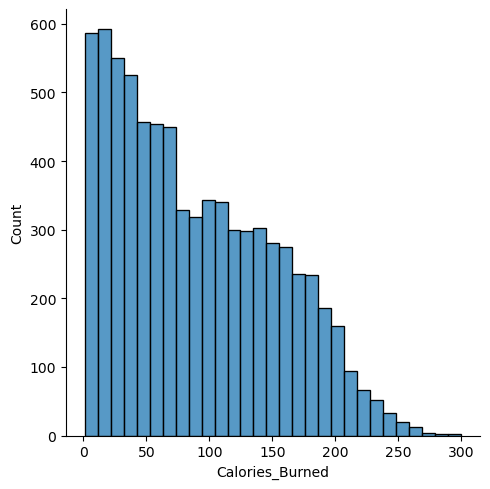

In [8]:
sns.displot(train['Calories_Burned'])
plt.show()

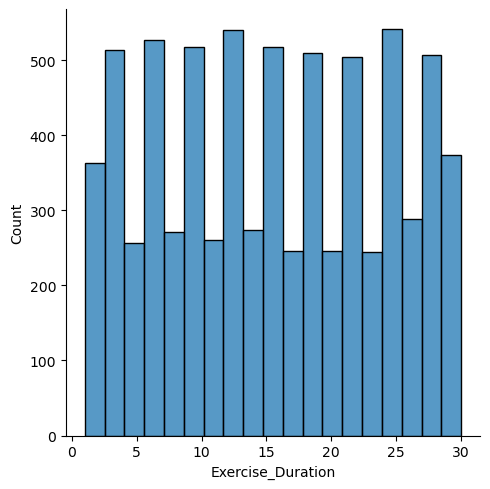

In [9]:
sns.displot(train['Exercise_Duration'])
plt.show()

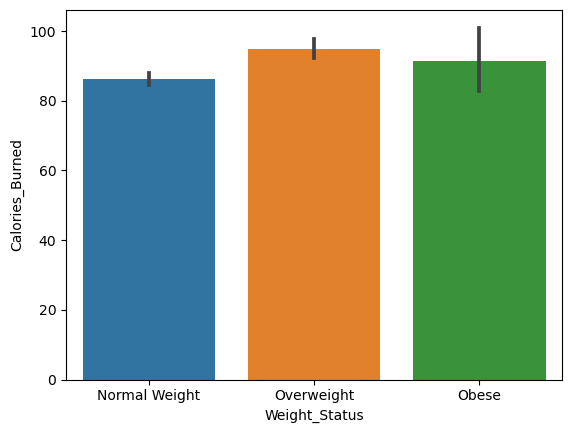

In [10]:
# barplot은 기본적으로 각 데이터의 평균을 보여줍니다.

sns.barplot(x = train['Weight_Status'], y = train['Calories_Burned'])
plt.show()

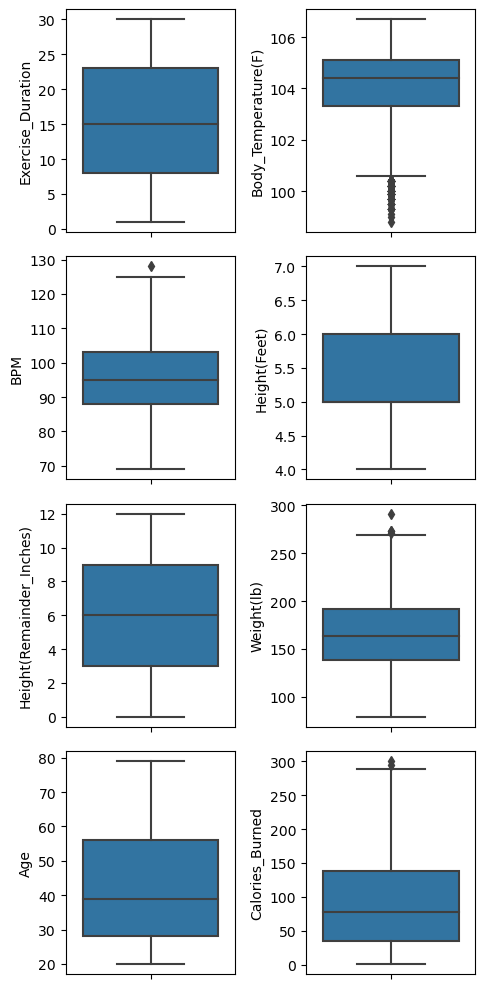

In [11]:
fig, axes = plt.subplots(4,2, figsize = (5,10))

sns.boxplot(y = train['Exercise_Duration'], ax = axes[0][0])
sns.boxplot(y = train['Body_Temperature(F)'], ax = axes[0][1])

sns.boxplot(y = train['BPM'], ax = axes[1][0])
sns.boxplot(y = train['Height(Feet)'], ax = axes[1][1])

sns.boxplot(y = train['Height(Remainder_Inches)'], ax = axes[2][0])
sns.boxplot(y = train['Weight(lb)'], ax = axes[2][1])

sns.boxplot(y = train['Age'], ax = axes[3][0])
sns.boxplot(y = train['Calories_Burned'], ax = axes[3][1])

plt.tight_layout()
plt.show()

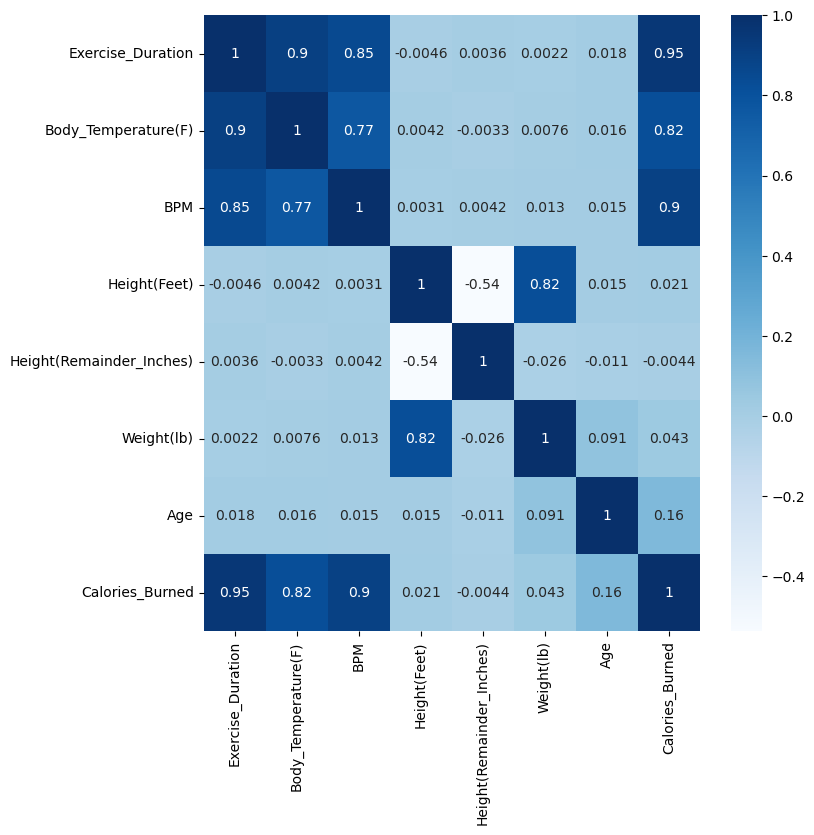

In [12]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

### 3. Data Cleansing & Feature Engineering

In [2]:
KNeighborsClassifier()

### 4. Model Tuning (Hyperparameter Optimization)

In [59]:
predictor = TabularPredictor(eval_metric='root_mean_squared_error',label='Calories_Burned').fit(train.iloc[:10000])

No path specified. Models will be saved in: "AutogluonModels/ag-20230526_174721/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230526_174721/"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.4.0: Mon Mar  6 20:59:28 PST 2023; root:xnu-8796.101.5~3/RELEASE_ARM64_T6000
Train Data Rows:    7500
Train Data Columns: 10
Label Column: Calories_Burned
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == float, but few unique label-values observed and label-values can be converted to int).
	First 10 (of 270) unique label values:  [166.0, 33.0, 23.0, 91.0, 32.0, 71.0, 18.0, 81.0, 172.0, 29.0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
F

Fitting model: LightGBMXT ...
	-9.3582	 = Validation score   (-root_mean_squared_error)
	408.85s	 = Training   runtime
	1.91s	 = Validation runtime
Fitting model: LightGBM ...
	-8.7175	 = Validation score   (-root_mean_squared_error)
	162.39s	 = Training   runtime
	0.5s	 = Validation runtime
Fitting model: RandomForestGini ...
	-7.7405	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestEntr ...
	-7.2275	 = Validation score   (-root_mean_squared_error)
	0.66s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-9.5185	 = Validation score   (-root_mean_squared_error)
	4590.11s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	-8.9561	 = Validation score   (-root_mean_squared_error)
	0.54s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	-10.8478	 = Validation score   (-root_mean_squared_error)
	0.54s	 = Tra

In [49]:
train_y = train['Calories_Burned']
train_x = train.drop(columns=['ID','Calories_Burned','Weight_Status','Gender'])

In [54]:
X_train, X_dev, y_train, y_dev = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

In [55]:
X_train

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age
5365,28.0,105.1,101.0,6.0,2.0,189.6,70
4341,30.0,105.3,104.0,5.0,8.0,165.3,47
7481,20.0,105.4,92.0,5.0,4.0,125.7,26
2731,18.0,103.8,97.0,5.0,7.0,152.1,37
1511,25.0,105.6,104.0,5.0,11.0,191.8,45
...,...,...,...,...,...,...,...
4931,20.0,104.7,99.0,6.0,3.0,205.0,33
3264,16.0,104.5,106.0,6.0,6.0,220.5,35
1653,13.0,104.0,95.0,5.0,10.0,187.4,28
2607,7.0,103.5,92.0,6.0,1.0,207.2,31


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
clfs = [
    (
        KNeighborsRegressor(),              
        {'n_neighbors': [3,5,7,9,11],        
         'weights': ['uniform','distance']}
    ),
    (
        MLPRegressor(random_state=0),
        {'batch_size': ['auto', 32, 64, 128],
         'learning_rate' : ['constant', 'adaptive'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam']}
    ),
    (
        LogisticRegression(random_state=0),  
        {'C': np.arange(0.1, 1.1, 0.1),      
         'penalty': ['l1','l2']}
    ),
    (
        RandomForestRegressor(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [None,3,4,5],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
#     (
#         GradientBoostingRegressor(random_state=0),
#         {'loss' : ["deviance"],
#          'n_estimators' : [100],
#          'learning_rate': [0.1, 0.05, 0.01],
#          'max_depth': [4],
#          'min_samples_leaf': [100,150],
#          'max_features': [0.3, 0.1]}
#         # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
#     ),
    (
        AdaBoostRegressor(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01]}
    ), 
    (
        LGBMRegressor(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],
          'max_depth': [None,3,4,5]}
    ),
     (
        XGBRegressor(random_state=0),
        {'min_child_weight' : [1],
         'n_estimators' : [250],
         'learning_rate': [0.07],
         'max_depth': [3, 4],
         'reg_alpha': [0,0.01]}
    )
]

In [70]:
clfs_tuned = []  # 튜닝된 모델을 저장
for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=5, scoring='neg_root_mean_squared_error', 
                                     cv=3, random_state=0, n_jobs=-1)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(X_dev, y_dev)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, rand_search, clf_score))

  0%|                                                       | 0/7 [00:00<?, ?it/s]

KNeighborsRegressor                                 -9.062333 0.1


 29%|█████████████▍                                 | 2/7 [00:03<00:09,  1.80s/it]

MLPRegressor                                        -6.737410 3.5


 43%|████████████████████▏                          | 3/7 [00:08<00:12,  3.14s/it]

LogisticRegression                                 -24.166726 5.0


 57%|██████████████████████████▊                    | 4/7 [00:13<00:11,  3.85s/it]

RandomForestRegressor                               -5.258591 5.0


 71%|█████████████████████████████████▌             | 5/7 [00:16<00:06,  3.43s/it]

AdaBoostRegressor                                  -11.562971 2.6


 86%|████████████████████████████████████████▎      | 6/7 [00:17<00:02,  2.62s/it]

LGBMRegressor                                       -4.542332 1.0


100%|███████████████████████████████████████████████| 7/7 [00:18<00:00,  2.58s/it]

XGBRegressor                                        -4.545822 0.8



/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partit

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partiti

In [103]:
from autogluon.tabular import TabularDataset, TabularPredictor

predictor = TabularPredictor(eval_metric='root_mean_squared_error',label='Calories_Burned').fit(train)

No path specified. Models will be saved in: "AutogluonModels/ag-20230527_115304/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230527_115304/"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.4.0: Mon Mar  6 20:59:28 PST 2023; root:xnu-8796.101.5~3/RELEASE_ARM64_T6000
Train Data Rows:    7500
Train Data Columns: 10
Label Column: Calories_Burned
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == float, but few unique label-values observed and label-values can be converted to int).
	First 10 (of 270) unique label values:  [166.0, 33.0, 23.0, 91.0, 32.0, 71.0, 18.0, 81.0, 172.0, 29.0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
F

Fitting model: LightGBMXT ...


[1000]	valid_set's multi_logloss: 7.29858	valid_set's root_mean_squared_error: -9.80123


	-9.3255	 = Validation score   (-root_mean_squared_error)
	558.52s	 = Training   runtime
	2.75s	 = Validation runtime
Fitting model: LightGBM ...
	-8.7175	 = Validation score   (-root_mean_squared_error)
	176.56s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: RandomForestGini ...
	-7.8542	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestEntr ...
	-7.6604	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: CatBoost ...
	-9.5185	 = Validation score   (-root_mean_squared_error)
	4879.24s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	-8.8429	 = Validation score   (-root_mean_squared_error)
	0.62s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	-10.6592	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.02s	 = Val

In [77]:
clf.predict(X_dev)

array([135.07161896,  11.40026023,  67.8585302 , ...,  59.19097597,
        86.48608716, 194.71626815])

### 5. Model Ensemble

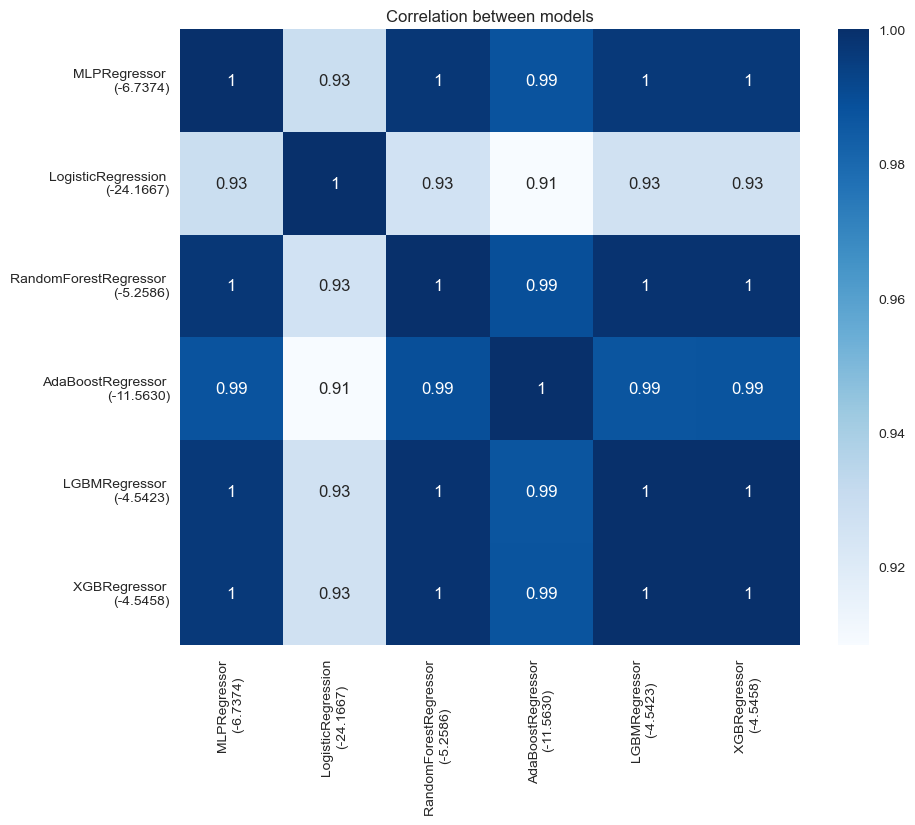

In [78]:
pred_results = []
for name, clf, clf_score in clfs_tuned[1:]:
    pred = clf.predict(X_dev)
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [79]:
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

MLPRegressor \n(-6.7374)             0.981423
LogisticRegression \n(-24.1667)      0.923415
RandomForestRegressor \n(-5.2586)    0.982006
AdaBoostRegressor \n(-11.5630)       0.971837
LGBMRegressor \n(-4.5423)            0.981769
XGBRegressor \n(-4.5458)             0.981828
dtype: float64

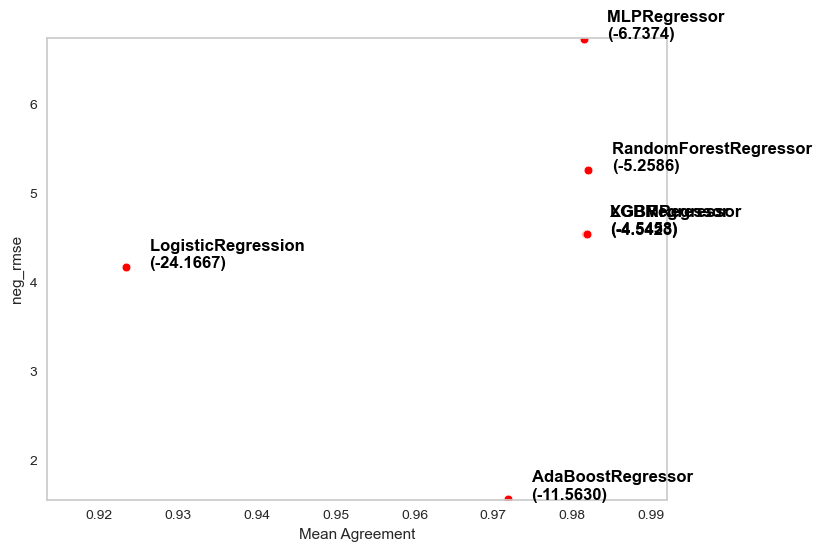

In [80]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('neg_rmse')
plt.grid()
plt.show()

## Averaging voting

### Standarized data

In [81]:
selected = [
    'MLPRegressor', 
    'LogisticRegression',
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'LGBMRegressor',
    'XGBRegressor'
]

models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

### 6. Deployment

In [ ]:
t = time.strftime('%m-%d_%H:%M')

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission['Calories_Burned'] = preds

In [ ]:
submission.to_csv(f'submission_file/{t}submit.csv', index = False)